<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/main/Lytkin%20Vladimir/Netoptic_yolo8_VL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Первый опыт работы с моделью YOLO8

## Установка пакетов и загрузка библиотек

In [3]:
# Чтобы обучить YOLOv8 custom, нам необходимо установить пакет ultralytics
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.158 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


In [4]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import os
import numpy as np
# import pytesseract
import pandas as pd
import glob

In [5]:
PATH_DATASET = '/content/drive/MyDrive/uai/st1/glasses_dataset_yolo8/'
PATH_DATASET_YAML = PATH_DATASET + 'glasses_v8.yaml'

# Монтирование GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd $PATH_DATASET


/content/drive/MyDrive/uai/st1/glasses_dataset_yolo8


In [5]:
!ls $PATH_DATASET

glasses_v8.yaml  test-20230817T205830Z-001.zip	 valid
runs		 train				 valid-20230817T205818Z-001.zip
test		 train-20230817T205601Z-001.zip  yolov8n.pt


In [6]:
!cat $PATH_DATASET_YAML

path: /content/drive/MyDrive/uai/st1/glasses_dataset_yolo8/
train: train/images
val: valid/images

names:
  0: arm_tag


## Загрузка модели 'yolov8n.pt' и обучение

In [9]:
# Load the model.
model = YOLO('yolov8n.pt')

# Training.
results = model.train(
   data=PATH_DATASET_YAML,
   imgsz=640,
   epochs=5,
   batch=8)
#   name='yolov8n_train')
model.val()

100%|██████████| 6.23M/6.23M [00:00<00:00, 28.0MB/s]
Ultralytics YOLOv8.0.158 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/uai/st1/glasses_dataset_yolo8/glasses_v8.yaml, epochs=5, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, r

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e91f4ae5cf0>
fitness: 0.4081724031799958
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.35648])
names: {0: 'arm_tag'}
plot: True
results_dict: {'metrics/precision(B)': 0.8750696894792854, 'metrics/recall(B)': 0.7004738884591406, 'metrics/mAP50(B)': 0.8734044098883572, 'metrics/mAP50-95(B)': 0.35647995799017784, 'fitness': 0.4081724031799958}
save_dir: PosixPath('runs/detect/val')
speed: {'preprocess': 2.0438671112060547, 'inference': 182.00883865356445, 'loss': 0.000476837158203125, 'postprocess': 3.656744956970215}

## Валидация модели

In [10]:
# Валидация модели
MODEL_PATH = PATH_DATASET + 'runs/detect/train/weights/best.pt'
model = YOLO(MODEL_PATH)  # Load the custom model

# Validate the model
metrics = model.val()
print('map50-95', metrics.box.map)
print('map50', metrics.box.map50)
print('map75', metrics.box.map75)

Ultralytics YOLOv8.0.158 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/uai/st1/glasses_dataset_yolo8/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.96s/it]
                   all         20         20      0.875        0.7      0.873      0.356
Speed: 1.6ms preprocess, 276.9ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect/val2


map50-95 0.35647995799017784
map50 0.8734044098883572
map75 0.12099627972082119


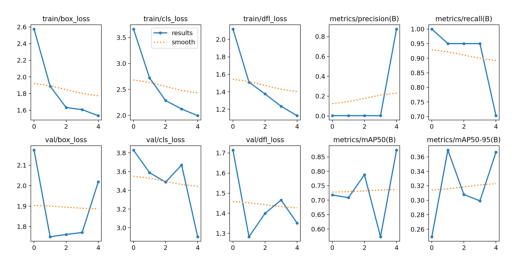

In [12]:
# Результаты обучения
TRAIN_RESULTS_PICTURE = PATH_DATASET + 'runs/detect/train/results.png'
plt.imshow(Image.open(TRAIN_RESULTS_PICTURE))
plt.axis('off')
plt.show()


## Проверка модели на тестовой выборке


image 1/3 /content/drive/MyDrive/uai/st1/glasses_dataset_yolo8/test/10.jpg: 640x480 (no detections), 158.0ms
image 2/3 /content/drive/MyDrive/uai/st1/glasses_dataset_yolo8/test/22.jpg: 640x480 1 arm_tag, 144.2ms
image 3/3 /content/drive/MyDrive/uai/st1/glasses_dataset_yolo8/test/test.jpg: 640x480 (no detections), 147.2ms
Speed: 4.0ms preprocess, 149.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/drive/MyDrive/uai/st1/glasses_dataset_yolo8/runs/detect/predict_yolov8n_5epochs


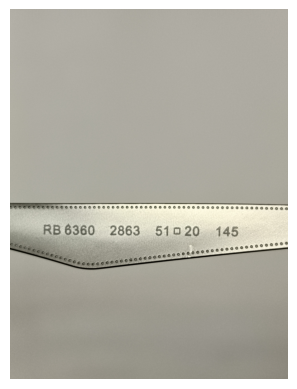

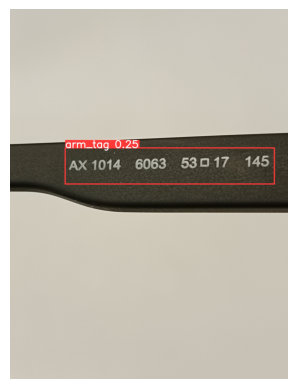

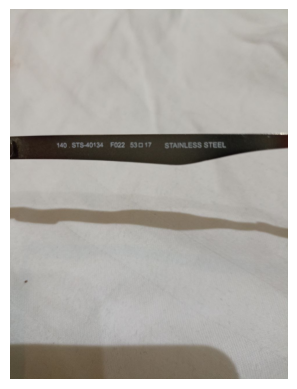

In [15]:
%matplotlib inline
# Проверка работы на тестовых изображениях

PATH_DATASET = '/content/drive/MyDrive/uai/st1/glasses_dataset_yolo8/'
MODEL_PATH = PATH_DATASET + 'runs/detect/train/weights/best.pt'
TEST_FILES = PATH_DATASET + 'test/'
PATH_PREDICT = PATH_DATASET + 'runs/detect/predict_yolov8n_5epochs/'

# Load model
model = YOLO(MODEL_PATH)  # Load the custom model
# results = model(TEST_FILE, show=True, imgsz=640, show_labels=True, max_det=1)  не работает вывод изображения в Colab

results = model(TEST_FILES, imgsz=640, show_labels=True, max_det=1, save=True, name=PATH_PREDICT)

predicted_images = glob.glob(PATH_PREDICT + '*.jpg')
for img in predicted_images:
  plt.imshow(Image.open(img))
  plt.axis('off')
  plt.show()


# Работает также через выполнение shell команд и переменные среды -------------------------------
# %env modelpath = $MODEL_PATH
# !echo $modelpath
# %env testfile = $TEST_FILE
# !echo $testfile
# !yolo predict model="$modelpath" source="$testfile" imgsz=640 show_labels=True max_det=1
# ----------------------------------------
